In [6]:
import os, sys, simplejson
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

# tf and keras
import tensorflow as tf
import keras

### Load data

In [94]:
recipe_df = pd.read_csv("../data/clean_recipes.csv", header=0, delimiter=";")
recipe_df.head(10)

,Recipe Name,Review Count,Recipe Photo,Author,Prepare Time,Cook Time,Total Time,Ingredients,Directions,RecipeID
0,Golden Crescent Rolls Recipe,304,https://images.media-allrecipes.com/userphotos...,Mike A.,25 m,15 m,3 h 10 m,"yeast,water,white sugar,salt,egg,butter,flour,...","Dissolve yeast in warm water.**Stir in sugar, ...",7000
1,Poppy Seed Bread with Glaze Recipe,137,https://images.media-allrecipes.com/userphotos...,Christina Jun,15 m,1 h,1 h 20 m,"flour,salt,baking powder,poppy,butter,vegetabl...",'Preheat oven to 350 degrees F (175 degrees C)...,7001
2,Applesauce Bread I Recipe,124,https://images.media-allrecipes.com/userphotos...,GAF55,10 m,1 h 20 m,1 h 30 m,"flour,egg,white sugar,vegetable oil,applesauce...",Preheat oven to 350 degrees F (175 degrees C)....,7003
3,Apple Raisin Bread Recipe,39,https://images.media-allrecipes.com/userphotos...,Helen Hanson,15 m,1 h,1 h 15 m,"flour,baking powder,baking soda,salt,cinnamon,...",Preheat oven to 350 degrees F (175 degrees C)....,7006
4,Buttermilk Oatmeal Bread Recipe,41,https://images.media-allrecipes.com/userphotos...,Helen Hanson,10 m,1 h,1 h 40 m,"oat,buttermilk,vegetable oil,egg,brown sugar,f...",Mix oats with buttermilk. Let stand for 1/2 h...,7007
5,Kolaches II Recipe,27,https://images.media-allrecipes.com/userphotos...,Nan,30 m,20 m,2 h 5 m,"shortening,white sugar,salt,milk,egg,lemon,yea...",Cream shortening and sugar together. Stir in ...,7008
6,Whole Wheat Bread II Recipe,91,https://images.media-allrecipes.com/userphotos...,Ruth Uitto,20 m,35 m,2 h 25 m,"shortening,water,brown sugar,yeast,water,white...",Dissolve brown sugar in 1 cup hot water. Add ...,7009
7,Cottage Cheese Bread II Recipe,27,https://images.media-allrecipes.com/userphotos...,Kathy Nowell,5 m,3 h,3 h 5 m,"water,cottage cheese,vegetable oil,egg,flour,w...",Add the ingredients to the pan of your bread m...,7012
8,Mocha Chocolate Chip Banana Muffins Recipe,579,https://images.media-allrecipes.com/userphotos...,Shelley Ross,10 m,25 m,35 m,"margarine,white sugar,egg,banana,coffee,water,...",Preheat oven to 350 degrees F (175 degrees C)....,7013
9,'Ruby''s Special Cornbread Recipe ',4,https://images.media-allrecipes.com/userphotos...,Mitzi Lyons,10 m,45 m,55 m,"cornmeal,milk,egg,bell pepper,onion,garlic,sal...",Preheat oven to 350 degrees F (175 degrees C)....,7014


### Process columns and plot

In [95]:
# process Review Count column

def normalize_review_count(x):
    if x.endswith("k") or x.endswith("K"):
        return int(x[:-1])*1000
    else:
        return int(x)
    
recipe_df["Review Count"] = recipe_df["Review Count"].apply(normalize_review_count)

<AxesSubplot:ylabel='Recipe Name'>

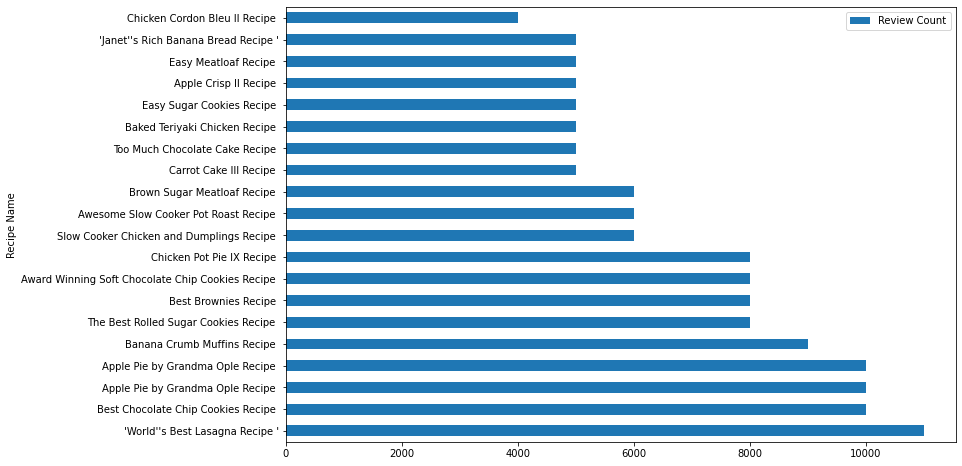

In [96]:
# Top 20 Recipes with highes review count

recipe_df.nlargest(20, "Review Count") \
.plot(x="Recipe Name", y="Review Count", kind="barh", figsize=(12, 8), rot=0)

<AxesSubplot:xlabel='Author'>

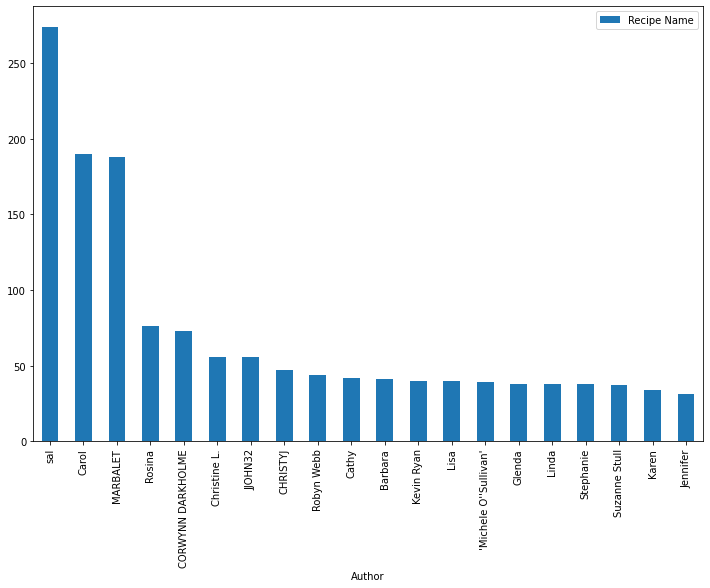

In [97]:
# Top 20 Authors

recipe_df.groupby("Author").count() \
    .reset_index()[["Author", "Recipe Name"]] \
    .set_index("Author").nlargest(20, "Recipe Name") \
    .plot(kind="bar", figsize=(12, 8), rot=90)

In [98]:
# process Prepare Time, Cook Time, and Total Time

def normalize_time_to_minutes(x):
    data = x.split(" ")
    if len(data) == 2:
        if data[1] == "m":
            return int(data[0])
        elif data[1] == "h":
            return int(data[0])*60
    elif len(data) == 4:
        return (int(data[0])*60) + (int(data[2]))

recipe_df["Cook Time"] = recipe_df["Cook Time"].apply(normalize_time_to_minutes)
recipe_df["Prepare Time"] = recipe_df["Prepare Time"].apply(normalize_time_to_minutes)
recipe_df["Total Time"] = recipe_df["Total Time"].apply(normalize_time_to_minutes)

recipe_df

,Recipe Name,Review Count,Recipe Photo,Author,Prepare Time,Cook Time,Total Time,Ingredients,Directions,RecipeID
0,Golden Crescent Rolls Recipe,304,https://images.media-allrecipes.com/userphotos...,Mike A.,25.0,15.0,190.0,"yeast,water,white sugar,salt,egg,butter,flour,...","Dissolve yeast in warm water.**Stir in sugar, ...",7000
1,Poppy Seed Bread with Glaze Recipe,137,https://images.media-allrecipes.com/userphotos...,Christina Jun,15.0,60.0,80.0,"flour,salt,baking powder,poppy,butter,vegetabl...",'Preheat oven to 350 degrees F (175 degrees C)...,7001
2,Applesauce Bread I Recipe,124,https://images.media-allrecipes.com/userphotos...,GAF55,10.0,80.0,90.0,"flour,egg,white sugar,vegetable oil,applesauce...",Preheat oven to 350 degrees F (175 degrees C)....,7003
3,Apple Raisin Bread Recipe,39,https://images.media-allrecipes.com/userphotos...,Helen Hanson,15.0,60.0,75.0,"flour,baking powder,baking soda,salt,cinnamon,...",Preheat oven to 350 degrees F (175 degrees C)....,7006
4,Buttermilk Oatmeal Bread Recipe,41,https://images.media-allrecipes.com/userphotos...,Helen Hanson,10.0,60.0,100.0,"oat,buttermilk,vegetable oil,egg,brown sugar,f...",Mix oats with buttermilk. Let stand for 1/2 h...,7007
...,...,...,...,...,...,...,...,...,...,...
12346,Hot Coffee Frosting Recipe,5,https://images.media-allrecipes.com/userphotos...,Jean,30.0,30.0,60.0,"sugar,butter,cocoa powder,vanilla,coffee","'In a large bowl, combine confectioners'' suga...",27456
12347,White Chocolate Blueberry Cheesecake Recipe,78,https://images.media-allrecipes.com/userphotos...,Scott M.,20.0,60.0,80.0,"CRUST:,ham,almond,white sugar,butter,caramel,F...",Preheat oven to 275 degrees F (135 degrees C)....,27478
12348,'Aunt Anne''s Coffee Cake Recipe ',704,https://images.media-allrecipes.com/userphotos...,Mary,20.0,25.0,45.0,"flour,white sugar,baking powder,salt,butter,eg...",Preheat oven to 350 degrees F (175 degrees C)....,27491
12349,Giant Ding Dong Cake Recipe,157,https://images.media-allrecipes.com/userphotos...,TheThreeDogKitchen,25.0,50.0,135.0,"cake,chocolate,egg,water,vegetable oil,flour,m...",Preheat oven to 350 degrees F (175 degrees C)....,27511


<AxesSubplot:xlabel='recipe', ylabel='time'>

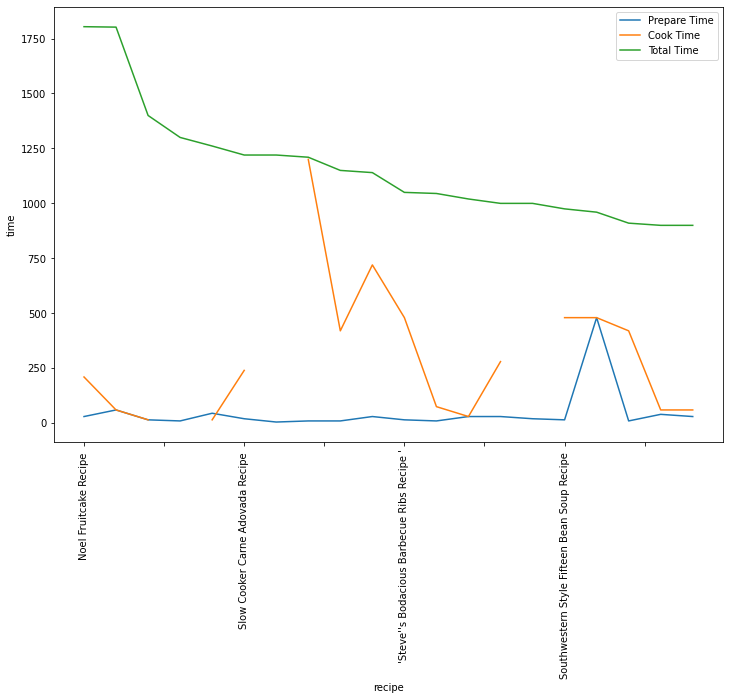

In [122]:
# Top 20 Recipes with longest Cooking Time

recipe_df.nlargest(20, "Total Time").plot(x="Recipe Name", 
                                          y=["Prepare Time", "Cook Time", "Total Time"],
                                          figsize=(12,8), kind="line", rot=90,
                                          ylabel="time", xlabel="recipe")